<a href="https://colab.research.google.com/github/ewankim1023/Projects/blob/master/SS_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install and import modules

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
#GPU version
!pip3 install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip install easyocr

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import torch
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Check GPU type
torch.cuda.get_device_name(0)

'Tesla K80'

# Step 2: Image loading and text recognition using EasyOCR

In [ ]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 

from google.colab import drive 

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/Colab Notebooks/SD_DLCV/OCR/images"

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 백업파일
'계약서_(태윤외1).pdf'
'Colab Notebooks'
'Conveyancercopyofapplicantoffer - 2021-09-03T092944.070.gdoc'
'Conveyancercopyofapplicantoffer - 2021-09-03T092944.070.pdf'
 GraduationCeremony
 HBR.zip
 images
 Indical
'My Drive'
 OneDrive_1_29-08-2021.zip
'PPT sample.pptx'
 ultra_workdir
 ultra_workdir2
'Vaccination Status.pdf'
'Wedding Photos'
mkdir: cannot create directory ‘/mydrive/Colab Notebooks/SD_DLCV/OCR/images’: File exists


In [ ]:
# Define path one by one, path name. 

im_3_path = '/mydrive/Colab Notebooks/SD_DLCV/OCR/images/3_barepure.jpeg'
im_4_path = '/mydrive/Colab Notebooks/SD_DLCV/OCR/images/Nud.jpeg'
im_5_path = '/mydrive/Colab Notebooks/SD_DLCV/OCR/images/pure.jpeg'

In [ ]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)


def inference(img_path):
  #Inference
  result = recognize_text(img_path)
  #Text in one line
  sentence = ''
  for (bbox, text, prob) in result:
    sentence += f'{text}'
  print(sentence)

In [ ]:
print(inference(im_3_path))
#print(inference(im_4_path))
#print(inference(im_5_path))

SMOOTHSKIN6r8+SAFE AND SIMPLE TO USE,COMPLETELY TAILORED TO YOU,purelSMOOTHSKIN BARE+SMOOTHSKIN PUREIS ULTRAFASTIS INTELLIGENT AND ULTRAFASTAWHOLE-BODY TREATMENT TAKES JUST 10 MINUTES044444444FLAT ENERGY LEVEL OFADJUSTABLE ENERGY LEVEL OF4J/CM23 TO 6J/CM?THE DEVICETHIS SMART DEVICEMEASURES YOURADAPTS EACH FLASH TO$SKIN TONEYOUR UNIQUE SKIN-TONE,AND WILL ONLY FLASHGIVING YOU THE SAFEST ANDIF ITS SAFEMOST POWERFUL TREATMENTUNLIMITED FLASHESTHE DEVICE COMES WITH STAMP AND GLIDE MODES,PERFECT FOR TARGETING LARGER AREAS LIKE THELEGS OR MORE PRECISE AREAS LIKE UPPER LIPTHERE ARE3 OPERATING MODESSIMPLY PRESSTo CHOOSE FROM WHETHER YOU WANT SOMETHINGAND GOIA BIT MORE GENTLE, FAST OR POWERFULWEEKSSEE RESULTS IN AS LITTLE AS 4 WEEKSONCE YOUR 12-WEEK TREATMENT PLAN HAS FINISHED, YOU CAN TOP UP EVERY:2-4 WEEKS4-8 WEEKSOR As REQUIREDOR As REQUIRED
None


In [ ]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            # print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./images{save_name}_overlay.jpg', bbox_inches='tight')

SMOOTHSKIN6r8+SAFE AND SIMPLE TO USE,COMPLETELY TAILORED TO YOU,purelSMOOTHSKIN BARE+SMOOTHSKIN PUREIS ULTRAFASTIS INTELLIGENT AND ULTRAFASTAWHOLE-BODY TREATMENT TAKES JUST 10 MINUTES044444444FLAT ENERGY LEVEL OFADJUSTABLE ENERGY LEVEL OF4J/CM23 TO 6J/CM?THE DEVICETHIS SMART DEVICEMEASURES YOURADAPTS EACH FLASH TO$SKIN TONEYOUR UNIQUE SKIN-TONE,AND WILL ONLY FLASHGIVING YOU THE SAFEST ANDIF ITS SAFEMOST POWERFUL TREATMENTUNLIMITED FLASHESTHE DEVICE COMES WITH STAMP AND GLIDE MODES,PERFECT FOR TARGETING LARGER AREAS LIKE THELEGS OR MORE PRECISE AREAS LIKE UPPER LIPTHERE ARE3 OPERATING MODESSIMPLY PRESSTo CHOOSE FROM WHETHER YOU WANT SOMETHINGAND GOIA BIT MORE GENTLE, FAST OR POWERFULWEEKSSEE RESULTS IN AS LITTLE AS 4 WEEKSONCE YOUR 12-WEEK TREATMENT PLAN HAS FINISHED, YOU CAN TOP UP EVERY:2-4 WEEKS4-8 WEEKSOR As REQUIREDOR As REQUIRED
None


<Figure size 432x288 with 0 Axes>

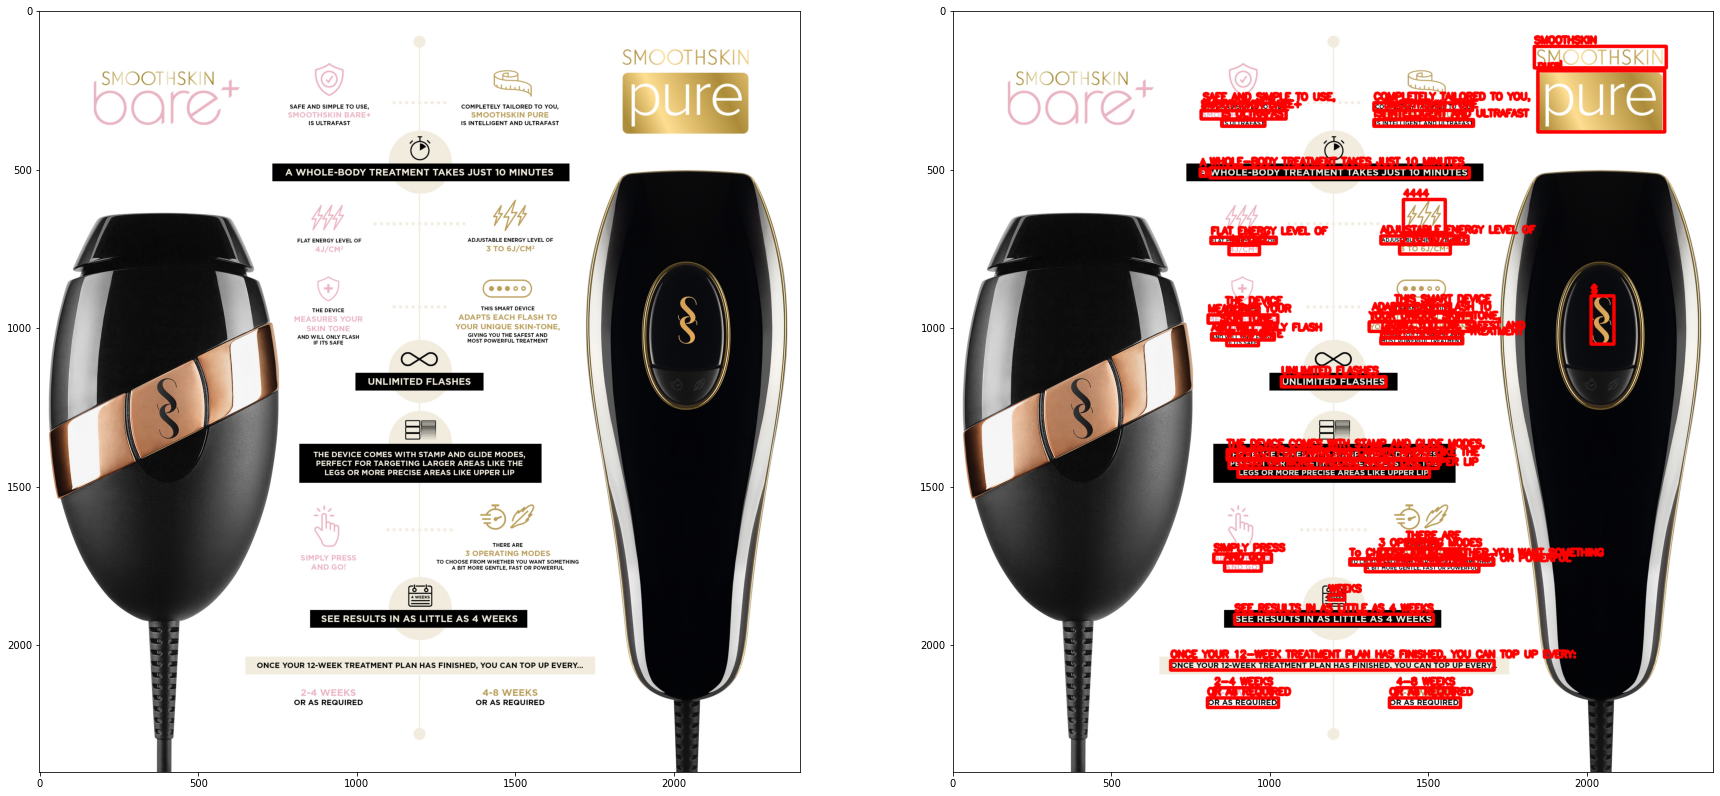

In [ ]:
overlay_ocr_text(im_3_path, '3_barepure')
print(inference(im_3_path))